# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='
weather_data = {}
count=0

In [6]:
for city in cities[:250]:
    city_name = cities[count]
    print(f'Processing city {count} | {city_name}')
    response = requests.get(f'{base_url}{city_name}').json()
    if response['cod']=='404':
        print('City not found. Skipping...')
    else:
        weather_data[count]={
        'City':response['name'],
        'Lat':response['coord']['lat'],
        'Lng':response['coord']['lon'],
        'Max Temp':response['main']['temp_max'],
        'Humidity':response['main']['humidity'],
        'Cloudiness':response['clouds']['all'],
        'Wind Speed':response['wind']['speed'],
        'Country':response['sys']['country'],
        'Date':response['dt']
    }
    count+=1

Processing city 0 | ushuaia
Processing city 1 | macaboboni
City not found. Skipping...
Processing city 2 | fairlie
Processing city 3 | arraial do cabo
Processing city 4 | tura
Processing city 5 | bahar
Processing city 6 | lebu
Processing city 7 | torrington
Processing city 8 | samusu
City not found. Skipping...
Processing city 9 | albany
Processing city 10 | namatanai
Processing city 11 | hilo
Processing city 12 | barrow
Processing city 13 | new norfolk
Processing city 14 | puerto ayora
Processing city 15 | hermanus
Processing city 16 | avarua
Processing city 17 | grindavik
Processing city 18 | illoqqortoormiut
City not found. Skipping...
Processing city 19 | grand river south east
City not found. Skipping...
Processing city 20 | carauari
Processing city 21 | lovec
City not found. Skipping...
Processing city 22 | ust-tsilma
Processing city 23 | kruisfontein
Processing city 24 | sataua
City not found. Skipping...
Processing city 25 | carnarvon
Processing city 26 | korla
Processing city 

Processing city 242 | imeni poliny osipenko
Processing city 243 | port macquarie
Processing city 244 | tocopilla
Processing city 245 | chanute
Processing city 246 | tarakan
Processing city 247 | sulangan
Processing city 248 | borlange
City not found. Skipping...
Processing city 249 | grand-santi


In [7]:
import time
time.sleep(30)

In [8]:
for city in cities[250:]:
    city_name = cities[count]
    print(f'Processing city {count} | {city_name}')
    response = requests.get(f'{base_url}{city_name}').json()
    if response['cod']=='404':
        print('City not found. Skipping...')
    else:
        weather_data[count]={
        'City':response['name'],
        'Lat':response['coord']['lat'],
        'Lng':response['coord']['lon'],
        'Max Temp':response['main']['temp_max'],
        'Humidity':response['main']['humidity'],
        'Cloudiness':response['clouds']['all'],
        'Wind Speed':response['wind']['speed'],
        'Country':response['sys']['country'],
        'Date':response['dt']
    }
    count+=1

Processing city 250 | nanortalik
Processing city 251 | sitka
Processing city 252 | sao felix do xingu
Processing city 253 | port blair
Processing city 254 | nakhon phanom
Processing city 255 | ambanja
Processing city 256 | visnes
Processing city 257 | gravdal
Processing city 258 | hoi an
Processing city 259 | suraabad
Processing city 260 | tirat karmel
Processing city 261 | mungaoli
Processing city 262 | sambava
Processing city 263 | umzimvubu
City not found. Skipping...
Processing city 264 | nuevo progreso
Processing city 265 | zhigansk
Processing city 266 | yashkul
Processing city 267 | port keats
Processing city 268 | byron bay
Processing city 269 | lasa
Processing city 270 | iqaluit
Processing city 271 | damphu
Processing city 272 | georgetown
Processing city 273 | jalu
Processing city 274 | phayao
Processing city 275 | marystown
Processing city 276 | dakar
Processing city 277 | geraldton
Processing city 278 | bengkulu
Processing city 279 | saleaula
City not found. Skipping...
Proc

Processing city 497 | yumen
Processing city 498 | garowe
Processing city 499 | halalo
City not found. Skipping...
Processing city 500 | loudi
Processing city 501 | bowen
Processing city 502 | araouane
Processing city 503 | aykhal
Processing city 504 | masuguru
Processing city 505 | tallahassee
Processing city 506 | bolshoye selo
Processing city 507 | luwuk
Processing city 508 | komatipoort
Processing city 509 | kloulklubed
Processing city 510 | tete
Processing city 511 | shenjiamen
Processing city 512 | wewak
Processing city 513 | hay river
Processing city 514 | kumta
Processing city 515 | plettenberg bay
Processing city 516 | haines junction
Processing city 517 | simbahan
Processing city 518 | goure
Processing city 519 | myitkyina
Processing city 520 | blatna
Processing city 521 | joetsu
Processing city 522 | kiama
Processing city 523 | lazo
Processing city 524 | lata
Processing city 525 | rokytne
Processing city 526 | vangaindrano
Processing city 527 | oksfjord
Processing city 528 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame(weather_data).transpose()
weather_df.to_csv('Output/city_weather_data.csv')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8,-68.3,31.66,86,90,13.8,AR,1628321961
2,Fairlie,55.756,-4.8556,62.11,92,100,7.31,GB,1628321961
3,Arraial do Cabo,-22.9661,-42.0278,66.11,77,100,11.36,BR,1628321962
4,Tura,25.5198,90.2201,78.42,95,100,5.5,IN,1628321962
5,Bahār,34.9072,48.4414,86.16,21,20,4.61,IR,1628321963


In [10]:
weather_df['Lat']=weather_df['Lat'].astype('float')
weather_df['Lng']=weather_df['Lng'].astype('float')
weather_df['Max Temp']=weather_df['Max Temp'].astype('float')
weather_df['Wind Speed']=weather_df['Wind Speed'].astype('float')
weather_df['Humidity']=weather_df['Humidity'].astype('int')
weather_df['Cloudiness']=weather_df['Cloudiness'].astype('int')
weather_df['Date']=weather_df['Date'].astype('int')
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int32
Cloudiness      int32
Wind Speed    float64
Country        object
Date            int32
dtype: object

In [11]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02
mean,19.940581,19.580305,71.393659,67.705441,57.941839,8.057542,1.628322e+09
std,33.001650,89.788417,14.417279,23.253294,39.925005,5.471162,1.004900e+02
min,-54.800000,-179.166700,31.660000,8.000000,0.000000,0.000000,1.628321e+09
25%,-6.411100,-59.516700,62.580000,55.000000,15.000000,3.890000,1.628322e+09
50%,22.678300,21.716700,72.540000,72.000000,75.000000,6.910000,1.628322e+09
75%,47.670300,97.400000,80.820000,87.000000,99.000000,11.360000,1.628322e+09
max,78.218600,179.316700,109.380000,100.000000,100.000000,32.210000,1.628322e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

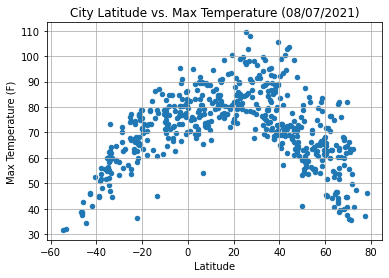

In [14]:
lat_temp = weather_df.plot('Lat','Max Temp',kind='scatter',
                xlabel='Latitude',ylabel='Max Temperature (F)',
                title=f'City Latitude vs. Max Temperature (08/07/2021)',
               grid=True)
plt.savefig('Output/lat_maxtemp.png')

## Latitude vs. Humidity Plot

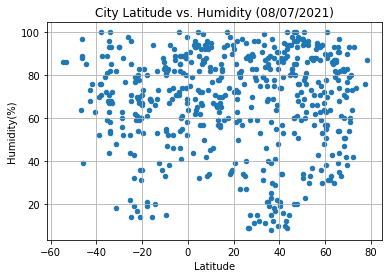

In [15]:
weather_df.plot('Lat','Humidity',kind='scatter',
                xlabel='Latitude',ylabel='Humidity(%)',
                title=f'City Latitude vs. Humidity (08/07/2021)',
               grid=True)
plt.savefig('Output/lat_humidity.png')

## Latitude vs. Cloudiness Plot

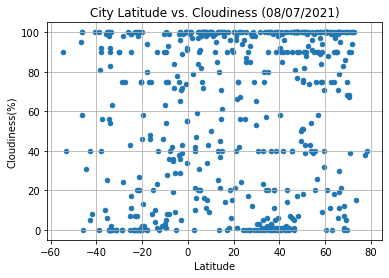

In [16]:
weather_df.plot('Lat','Cloudiness',kind='scatter',
                xlabel='Latitude',ylabel='Cloudiness(%)',
                title=f'City Latitude vs. Cloudiness (08/07/2021)',
               grid=True)
plt.savefig('Output/lat_cloudiness.png')

## Latitude vs. Wind Speed Plot

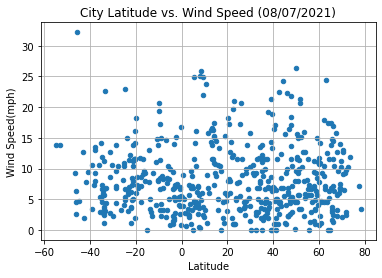

In [17]:
weather_df.plot('Lat','Wind Speed',kind='scatter',
                xlabel='Latitude',ylabel='Wind Speed(mph)',
                title=f'City Latitude vs. Wind Speed (08/07/2021)',
               grid=True)
plt.savefig('Output/lat_windspeed.png')

## Linear Regression

In [18]:
nh_weather_df = weather_df[weather_df['Lat'] >= 0].reset_index(drop=True)
sh_weather_df = weather_df[weather_df['Lat'] <= 0].reset_index(drop=True)
nh_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fairlie,55.7560,-4.8556,62.11,92,100,7.31,GB,1628321961
1,Tura,25.5198,90.2201,78.42,95,100,5.50,IN,1628321962
2,Bahār,34.9072,48.4414,86.16,21,20,4.61,IR,1628321963
3,Torrington,41.8007,-73.1212,70.09,91,96,3.44,US,1628321456
4,Albany,42.6001,-73.9662,68.67,88,100,2.53,US,1628321835


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

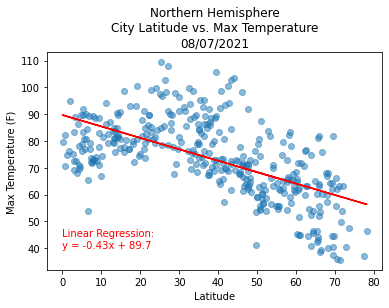

In [19]:
nh_lat = nh_weather_df['Lat']
nh_temp = nh_weather_df['Max Temp']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_temp)
lin_regress = nh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(nh_lat,nh_temp,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere\nCity Latitude vs. Max Temperature\n08/07/2021')
plt.plot(nh_lat,lin_regress,'r')
plt.annotate(line_eq,(0,40),color='red')
plt.show
plt.savefig('Output/nh_lat_maxtemp_linregress.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

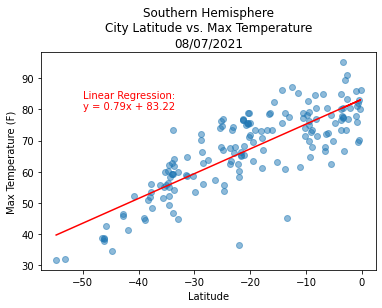

In [20]:
sh_lat = sh_weather_df['Lat']
sh_temp = sh_weather_df['Max Temp']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_temp)
lin_regress = sh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(sh_lat,sh_temp,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere\nCity Latitude vs. Max Temperature\n08/07/2021')
plt.plot(sh_lat,lin_regress,'r')
plt.annotate(line_eq,(-50,80),color='red')
plt.show
plt.savefig('Output/sh_lat_maxtemp_linregress.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

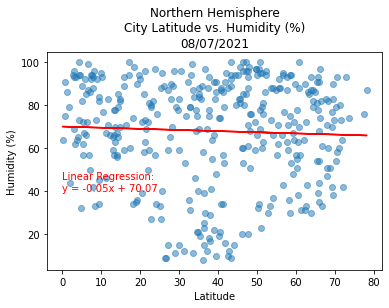

In [21]:
nh_humidity = nh_weather_df['Humidity']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_humidity)
lin_regress = nh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(nh_lat,nh_humidity,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere\nCity Latitude vs. Humidity (%)\n08/07/2021')
plt.plot(nh_lat,lin_regress,'r')
plt.annotate(line_eq,(0,40),color='red')
plt.show
plt.savefig('Output/nh_lat_humidity_linregress.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

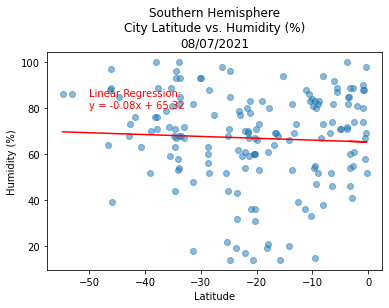

In [22]:
sh_humidity = sh_weather_df['Humidity']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_humidity)
lin_regress = sh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(sh_lat,sh_humidity,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere\nCity Latitude vs. Humidity (%)\n08/07/2021')
plt.plot(sh_lat,lin_regress,'r')
plt.annotate(line_eq,(-50,80),color='red')
plt.show
plt.savefig('Output/sh_lat_humidity_linregress.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

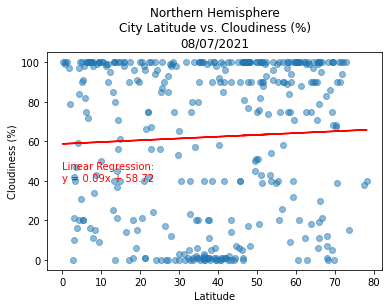

In [23]:
nh_clouds = nh_weather_df['Cloudiness']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_clouds)
lin_regress = nh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(nh_lat,nh_clouds,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere\nCity Latitude vs. Cloudiness (%)\n08/07/2021')
plt.plot(nh_lat,lin_regress,'r')
plt.annotate(line_eq,(0,40),color='red')
plt.show
plt.savefig('Output/nh_lat_cloudiness_linregress.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

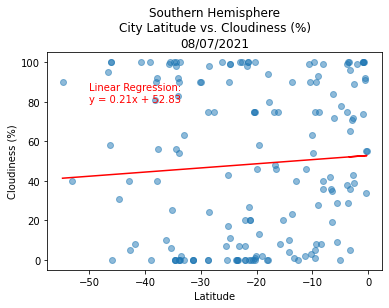

In [24]:
sh_cloudiness = sh_weather_df['Cloudiness']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_cloudiness)
lin_regress = sh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(sh_lat,sh_cloudiness,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere\nCity Latitude vs. Cloudiness (%)\n08/07/2021')
plt.plot(sh_lat,lin_regress,'r')
plt.annotate(line_eq,(-50,80),color='red')
plt.show
plt.savefig('Output/sh_lat_cloudiness_linregress.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

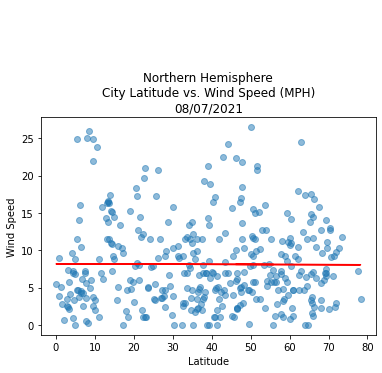

In [25]:
nh_wind = nh_weather_df['Wind Speed']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_wind)
lin_regress = nh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(nh_lat,nh_wind,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere\nCity Latitude vs. Wind Speed (MPH)\n08/07/2021')
plt.plot(nh_lat,lin_regress,'r')
plt.annotate(line_eq,(0,40),color='red')
plt.show
plt.savefig('Output/nh_lat_windspeed_linregress.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

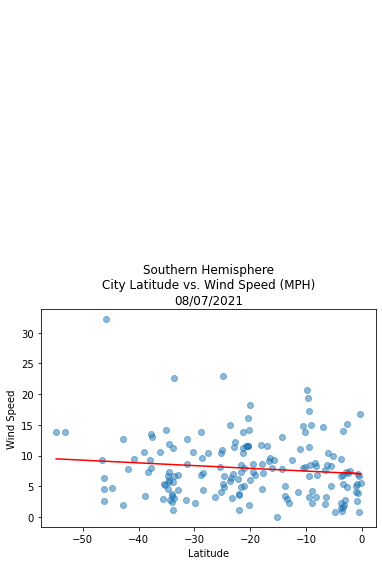

In [26]:
sh_wind = sh_weather_df['Wind Speed']
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_wind)
lin_regress = sh_lat*slope+intercept
line_eq = 'Linear Regression:\ny = '+ str(round(slope,2))+'x + '+str(round(intercept,2))
plt.scatter(sh_lat,sh_wind,alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere\nCity Latitude vs. Wind Speed (MPH)\n08/07/2021')
plt.plot(sh_lat,lin_regress,'r')
plt.annotate(line_eq,(-50,80),color='red')
plt.show
plt.savefig('Output/sh_lat_windspeed_linregress.png')